# Business Problem Statement :

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.


You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

##Data Dictionary:

* ‘Unnamed 0’- Index of the dataset
* Email_hash- Anonymised Personal Identifiable Information (PII)
* Company_hash- Current employer of the learner
* orgyear- Employment start date
* CTC- Current CTC
* Job_position- Job profile in the company
* CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

In [299]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Loading data into Dataframe:

In [300]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv -O scaler_clustering.csv

--2023-10-27 16:47:35--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.37.159, 13.35.37.7, 13.35.37.31, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.37.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24735965 (24M) [text/plain]
Saving to: ‘scaler_clustering.csv’

scaler_clustering.c 100%[===================>]  23.59M  82.4MB/s    in 0.3s    

2023-10-27 16:47:35 (82.4 MB/s) - ‘scaler_clustering.csv’ saved [24735965/24735965]



In [301]:
df=pd.read_csv('scaler_clustering.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


* We have 205843 data points, and 7 features
* We can drop the column Unnamed: 0 as it's the row Sr. No.


In [302]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


#Exploratory Data Analysis

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [304]:
df.describe(include="all")

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
count,205799,205843,205757.000000,2.058430e+05,153281,205843.000000
unique,37299,153443,NaN,NaN,1017,NaN
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,NaN,NaN,Backend Engineer,NaN
freq,8337,10,NaN,NaN,43554,NaN
mean,NaN,NaN,2014.882750,2.271685e+06,NaN,2019.628231
std,NaN,NaN,63.571115,1.180091e+07,NaN,1.325104
min,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,NaN,2013.000000,5.300000e+05,NaN,2019.000000
50%,NaN,NaN,2016.000000,9.500000e+05,NaN,2020.000000
75%,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


In [305]:
# Checking for null values
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [306]:
#DUPLICATE VALUE CHECK
df.duplicated().value_counts()

False    205810
True         33
dtype: int64

In [308]:
df.drop_duplicates(inplace=True)
df.shape

(205810, 6)

In [309]:
#DUPLICATE VALUE CHECK
df.duplicated().value_counts()

False    205810
dtype: int64

In [310]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)

In [311]:
print("Numerical features - ",len(num_cols),"\n")
i = 1
for col in num_cols:
  print(i,":", col, " -", df[col].nunique(),"unique values. They are", df[col].unique())
  i = i + 1

Numerical features -  3 

1 : orgyear  - 77 unique values. They are [2.0160e+03 2.0180e+03 2.0150e+03 2.0170e+03 2.0190e+03 2.0200e+03
 2.0120e+03 2.0130e+03 2.0030e+03 2.0060e+03 2.0140e+03 2.0110e+03
 2.0210e+03 2.0080e+03 2.0040e+03 2.0220e+03 2.0090e+03 2.0050e+03
 2.0100e+03 2.0070e+03 2.0000e+03 2.0020e+03 2.0230e+03 2.0010e+03
 1.9810e+03 2.0310e+03        nan 2.0240e+03 1.9960e+03 1.9990e+03
 2.1060e+03 1.9970e+03 1.9940e+03 1.9950e+03 1.9920e+03 1.9730e+03
 1.9910e+03 1.9980e+03 1.9900e+03 1.9930e+03 1.9880e+03 2.0250e+03
 2.0290e+03 0.0000e+00 2.0800e+02 1.9850e+03 2.0900e+02 2.0600e+02
 1.9820e+03 2.0260e+03 1.9700e+03 2.1010e+03 1.9720e+03 2.1070e+03
 1.9860e+03 1.9890e+03 9.1000e+01 1.9870e+03 3.0000e+00 2.0270e+03
 2.0000e+00 1.9760e+03 4.0000e+00 5.0000e+00 1.9710e+03 1.9770e+03
 1.9840e+03 8.3000e+01 1.0000e+00 1.9790e+03 2.0280e+03 2.2040e+03
 3.8000e+01 1.9000e+03 2.0100e+02 6.0000e+00 2.0165e+04 2.0000e+02]
2 : ctc  - 3360 unique values. They are [1100000  449999 200

## Checking unique emails and frequency of occurrence of the same email hash in the data.

In [312]:
print("Categorical features - ",len(cat_cols),"\n")
i = 1
for col in cat_cols:
  print(i,":", col, " -", df[col].nunique(),"unique values. They are", df[col].unique())
  i = i + 1

Categorical features -  3 

1 : company_hash  - 37299 unique values. They are ['atrgxnnt xzaxv' 'qtrxvzwt xzegwgbb rxbxnta' 'ojzwnvwnxw vx' ...
 'ztdnowb xzwqtee' 'mrht onvnt axsxnvr' 'bvptbjnqxu td vbvkgz']
2 : email_hash  - 153443 unique values. They are ['6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af'
 'b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b'
 '4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059' ...
 'cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c'
 'fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699'
 '0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31']
3 : job_position  - 1017 unique values. They are ['Other' 'FullStack Engineer' 'Backend Engineer' ... 'Web / UI Designer'
 'Azure data Factory' 'Android Application developer']


In [313]:
print("Unique values : ", df["email_hash"].nunique())
print("Value counts : ")
print(df["email_hash"].value_counts())

Unique values :  153443
Value counts : 
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
                                                                    ..
63933d31becd1487d93d56844919896334e3ae39c4095979816c6fbb8816153a     1
23bcc14067e0fec60b8772b3e20abbb8fa9f2146738d37056e0d20d33a97c690     1
5a1c9d9a745d6ee95136047698dba8f68f00bac522de6d83d18cf062f7286e22     1
062597458dc597d35b2dbf3e417ac160244dc8c3dd50fce716837dc1e6fc7a10     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64


In [314]:
# Using a regex function for removing special characters

import re
def remove_special (string):
    new_string=re.sub('[^A-Za-z ]+', '', string)
    return new_string

In [315]:
for col in cat_cols:
 print(col)

company_hash
email_hash
job_position


In [316]:
# Data Cleaning on company_hash

df.company_hash=df.company_hash.apply(lambda x: remove_special(str(x)))
df.company_hash=df.company_hash.apply(lambda x: x.lower())
df.company_hash=df.company_hash.apply(lambda x: x.strip())

In [317]:
# Data Cleaning on email_hash

df.email_hash=df.email_hash.apply(lambda x: remove_special(str(x)))
df.email_hash=df.email_hash.apply(lambda x: x.lower())
df.email_hash=df.email_hash.apply(lambda x: x.strip())

In [318]:
# Data Cleaning on job_position

df.job_position=df.job_position.apply(lambda x: remove_special(str(x)))
df.job_position=df.job_position.apply(lambda x: x.lower())
df.job_position=df.job_position.apply(lambda x: x.strip())

In [319]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,nan,2019.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,nan,2021.0
205841,zgn vuurxwvmrt,fbaaffcefdefeefcecfafa,2019.0,5100000,nan,2019.0


In [320]:
print("Unique values : ", df["email_hash"].nunique())
print("Value counts : ")
print(df["email_hash"].value_counts())

Unique values :  153443
Value counts : 
bbaceccbbcbcabdcfcbcffab     10
eedaaadabbfbfebefaafcceaf     9
feaababfedabdbbbcdec          9
ceccedcaeeedfdaaebeee         9
cebdabdebddefdcdebfeccabd     8
                             ..
dbecdddeaeccfbba              1
bccefecbbeabbbfafdeddac       1
acdadeedbaffbacdeddcffe       1
dcdbdbfeacdccddfcedcefca      1
bcfcdfedcaaaabbdafeaadc       1
Name: email_hash, Length: 153443, dtype: int64


In [321]:
df.drop_duplicates(inplace=True)
df.shape

(205698, 6)

In [322]:
# Checking for null values
df.isna().sum()

company_hash         0
email_hash           0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [323]:
#removing rows where company or job_position is not available

df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

In [324]:
df.shape

(205603, 6)

In [325]:
company_median_org_year=df.groupby('company_hash')['orgyear'].median()
company_median_org_year

company_hash
a                                               2017.0
a b onttr wgqu                                  2019.0
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx    2015.0
a ntwy ogrhnxgzo ucn rna                        2013.0
a ntwyzgrgsxto                                  2015.0
                                                 ...  
zz                                              2011.0
zz wgzztwn mya                                  2009.0
zzb ztdnstz vacxogqj ucn rna                    2017.0
zzgato                                          2014.0
zzzbzb                                          1990.0
Name: orgyear, Length: 37205, dtype: float64

In [326]:
#Code to impute
def null_imputation(table_from_which_we_need_to_fill, main_col, null_col):
    if np.isnan(null_col):
        return table_from_which_we_need_to_fill[main_col]
    else:
        return null_col

In [327]:
# Filling Null values using Median Target Imputation for Orgyear

df['orgyear']=df.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)
df['orgyear']

<ipython-input-327-a6bd3b594005>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear']=df.apply(lambda x: null_imputation(company_median_org_year,x['company_hash'],x['orgyear'] ), axis=1)


0         2016.0
1         2018.0
2         2015.0
3         2017.0
4         2017.0
           ...  
205838    2008.0
205839    2017.0
205840    2021.0
205841    2019.0
205842    2014.0
Name: orgyear, Length: 205603, dtype: float64

In [328]:
#if we still have null values, we'll drop it

len(df[df['orgyear'].isnull()])

26

In [329]:
#dropping remaining null values
df=df[~df['orgyear'].isnull()]

In [330]:
# Checking for null values -No missing values
df.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

#Outlier Detection and Treatment

In [331]:
#simple understanding
df.orgyear.value_counts().sort_values(ascending=True)
#There are outlier in the values

200.0         1
1981.0        1
206.0         1
2011.5        1
208.0         1
          ...  
2015.0    20584
2016.0    23021
2017.0    23225
2019.0    23396
2018.0    25241
Name: orgyear, Length: 80, dtype: int64

In [344]:
#removing outliers from orgyear using IQR

q1=df.orgyear.quantile(0.25)
q3=df.orgyear.quantile(0.75)
iqr=q3-q1
df=df.loc[(df.orgyear>=q1-1.5*iqr) & (df.orgyear<=q3+1.5*iqr)]


In [333]:
#simple understanding
df.ctc.value_counts().sort_values(ascending=True)
#There are outlier in the values

3327000       1
3652781       1
2365000       1
1699999       1
537000        1
           ... 
800000     6670
500000     7174
1000000    7375
400000     7543
600000     7761
Name: ctc, Length: 3296, dtype: int64

In [348]:
#removing outliers from ctc using IQR

q1=df.ctc.quantile(0.25)
q3=df.ctc.quantile(0.75)
iqr=q3-q1
df=df.loc[(df.ctc>=q1-1.5*iqr) & (df.ctc<=q3+1.5*iqr)]

In [349]:
df.orgyear.value_counts().sort_index(ascending=True)

2008.0     2045
2009.0     2880
2010.0     4569
2011.0     6614
2011.5        1
2012.0     8958
2013.0    10757
2014.0    15000
2014.5        2
2015.0    18738
2016.0    21108
2017.0    21687
2018.0    23749
2018.5        1
2019.0    22258
2020.0    12603
2021.0     3319
2022.0      775
2023.0      201
2024.0       32
Name: orgyear, dtype: int64

In [336]:
#simple understanding
df.ctc.value_counts().sort_values(ascending=True)

234000        1
911000        1
1033000       1
813000        1
1091000       1
           ... 
800000     6670
500000     7174
1000000    7375
400000     7543
600000     7761
Name: ctc, Length: 2358, dtype: int64

In [337]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fecfeedcfbdeaffecfbbbb,2021.0,800000,nan,2021.0
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,nan,2019.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,nan,2020.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,nan,2021.0


There are nan value in the job_position

In [338]:
df.loc[df['job_position']=='nan','job_position']=np.nan

In [339]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fecfeedcfbdeaffecfbbbb,2021.0,800000,NaN,2021.0
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,NaN,2019.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,NaN,2021.0


In [346]:
def numerical_feat(df,colname,nrows=2,mcols=2,width=15,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='crimson',ax=ax[rows][0])

        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.histplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

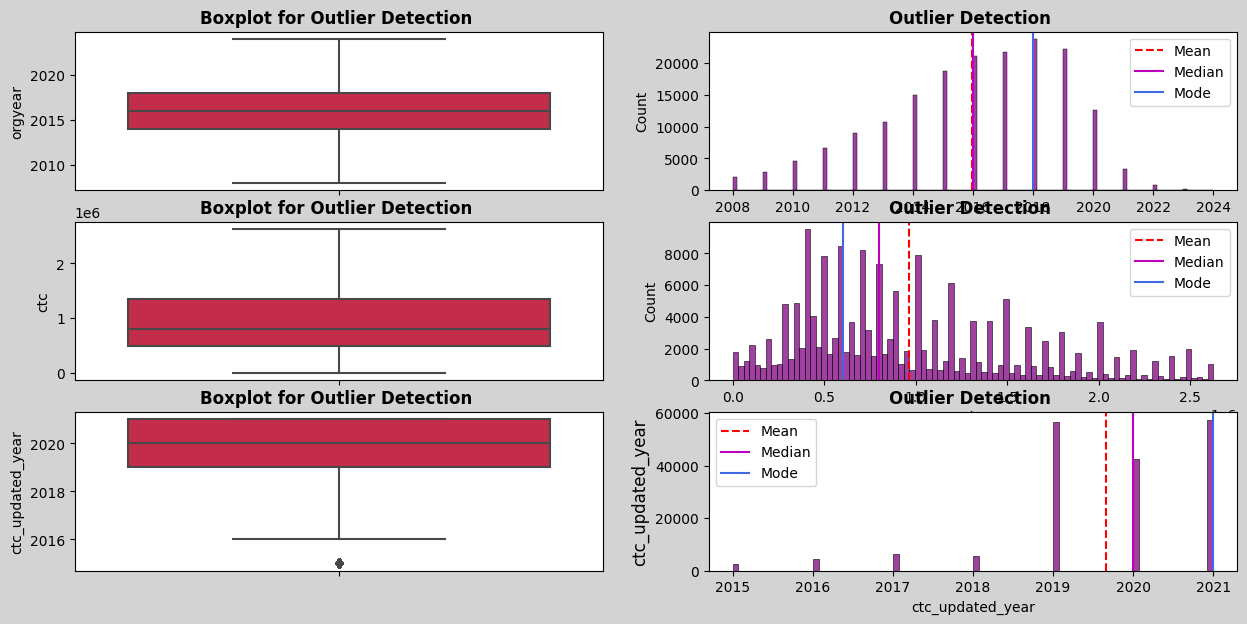

In [350]:
numerical_feat(df,num_cols,len(num_cols),2,15,7)

#Data Pre-processing:

In [351]:
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=5,'Others') if x.name=='company_hash' else x)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0
2,Others,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fecfeedcfbdeaffecfbbbb,2021.0,800000,NaN,2021.0
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,NaN,2019.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,NaN,2020.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,NaN,2021.0


##Creating Years of Experience Columns

In [352]:
df.drop_duplicates(inplace=True)
df.shape

(175219, 6)

In [353]:
#orgyear check
df['orgyear'] = df.apply(lambda x: x['orgyear'] if x['orgyear'] <= 2023 else 2023, axis=1)

In [354]:
df['years_of_experience']=2022-df['orgyear']

In [355]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0,5.0
...,...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fecfeedcfbdeaffecfbbbb,2021.0,800000,NaN,2021.0,1.0
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,NaN,2019.0,14.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,NaN,2020.0,5.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,NaN,2021.0,1.0


In [356]:
#ctc_updated_year_check
df['ctc_updated_year'] = df.apply(lambda x: x['orgyear'] if x['ctc_updated_year'] < x['orgyear'] else x['ctc_updated_year'], axis=1)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience
0,atrgxnnt xzaxv,deadabcffcbcdcccaeacaf,2016.0,1100000,other,2020.0,6.0
1,qtrxvzwt xzegwgbb rxbxnta,baafacbcbebacdaddcaabdccb,2018.0,449999,fullstack engineer,2019.0,4.0
2,Others,cbcdfbcabaeaefddefdcdfbb,2015.0,2000000,backend engineer,2020.0,7.0
3,ngpgutaxv,effdedeaecafcaddbbcadddfec,2017.0,700000,backend engineer,2019.0,5.0
4,qxen sqghu,ffefcbacdbcbdfabbbadb,2017.0,1400000,fullstack engineer,2019.0,5.0
...,...,...,...,...,...,...,...
205837,zgn vuurxwvmrt,fecfeedcfbdeaffecfbbbb,2021.0,800000,NaN,2021.0,1.0
205838,vuurt xzw,bceefeedffdabefcfbedcbafec,2008.0,220000,NaN,2019.0,14.0
205839,husqvawgb,fffadebbecafdcbcebacdb,2017.0,500000,NaN,2020.0,5.0
205840,vwwgrxnt,cbcceafacdafcffceddcbdafdeec,2021.0,700000,NaN,2021.0,1.0


In [357]:
#Filling null values with others -- if not done before
df['job_position'] = df['job_position'].fillna('Others')

In [358]:
# Checking for null values
df.isna().sum()

company_hash           0
email_hash             0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [359]:
df.drop(columns=["email_hash"],inplace=True)

##Manual Clustering on the basis of learner’s company, job position and years of experience

In [360]:
yoe_jp_ch=df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
yoe_jp_ch

count       mean  \
years_of_experience job_position       company_hash                         
-1.0                Others             Others             10.0   765400.0   
                                       atrr                1.0  1000000.0   
                                       eqtoytq             1.0  1400000.0   
                                       eqttrvzwtq          1.0   900000.0   
                                       gjg qggbo           1.0  1150000.0   
...                                                        ...        ...   
 14.0               support engineer   wxowg               1.0  1000000.0   
                                       xzegojo             1.0  1200000.0   
                                       zgpxv               1.0  2400000.0   
                    technology analyst xzegojo             1.0   656000.0   
                    web  ui designer   vrgyv ntwyzgrgsj    1.0  1019999.0   

                                                                   std  \
years_of_experience job_position       company_hash                      
-1.0                Others             Others            652893.082961   
                                       atrr                        NaN   
                                       eqtoytq                     NaN   
                                       eqttrvzwtq                  NaN   
                                       gjg qggbo                   NaN   
...                                                                ...   
 14.0               support engineer   wxowg                       NaN   
                                       xzegojo                     NaN   
                                       zgpxv                       NaN   
                    technology analyst xzegojo                     NaN   
                    web  ui designer   vrgyv ntwyzgrgsj            NaN   

                                                               min        25%  \
years_of_experience job_position       company_hash                             
-1.0                Others             Others              14000.0   182500.0   
                                       atrr              1000000.0  1000000.0   
                                       eqtoytq           1400000.0  1400000.0   
                                       eqttrvzwtq         900000.0   900000.0   
                                       gjg qggbo         1150000.0  1150000.0   
...                                                            ...        ...   
 14.0               support engineer   wxowg             1000000.0  1000000.0   
                                       xzegojo           1200000.0  1200000.0   
                                       zgpxv             2400000.0  2400000.0   
                    technology analyst xzegojo            656000.0   656000.0   
                    web  ui designer   vrgyv ntwyzgrgsj  1019999.0  1019999.0   

                                                               50%        75%  \
years_of_experience job_position       company_hash                             
-1.0                Others             Others             690000.0  1327500.0   
                                       atrr              1000000.0  1000000.0   
                                       eqtoytq           1400000.0  1400000.0   
                                       eqttrvzwtq         900000.0   900000.0   
                                       gjg qggbo         1150000.0  1150000.0   
...                                                            ...        ...   
 14.0               support engineer   wxowg             1000000.0  1000000.0   
                                       xzegojo           1200000.0  1200000.0   
                                       zgpxv             2400000.0  2400000.0   
                    technology analyst xzegojo            656000.0   656000.0   
                    web  ui designer   vrgyv ntwyzgrgsj  1019999.0

In [361]:
df_cjy=df.merge(yoe_jp_ch, on=['years_of_experience','job_position','company_hash'], how = 'left')
df_cjy.sort_values(['years_of_experience','job_position','company_hash'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
9238,Others,2023.0,680000,Others,2023.0,-1.0,10.0,765400.0,652893.082961,14000.0,182500.0,690000.0,1327500.0,1760000.0
44359,Others,2023.0,110000,Others,2023.0,-1.0,10.0,765400.0,652893.082961,14000.0,182500.0,690000.0,1327500.0,1760000.0
48088,Others,2023.0,80000,Others,2023.0,-1.0,10.0,765400.0,652893.082961,14000.0,182500.0,690000.0,1327500.0,1760000.0
63204,Others,2023.0,700000,Others,2023.0,-1.0,10.0,765400.0,652893.082961,14000.0,182500.0,690000.0,1327500.0,1760000.0
90070,Others,2023.0,400000,Others,2023.0,-1.0,10.0,765400.0,652893.082961,14000.0,182500.0,690000.0,1327500.0,1760000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30257,wxowg,2008.0,1000000,support engineer,2021.0,14.0,1.0,1000000.0,NaN,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
42895,xzegojo,2008.0,1200000,support engineer,2021.0,14.0,1.0,1200000.0,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
29085,zgpxv,2008.0,2400000,support engineer,2021.0,14.0,1.0,2400000.0,NaN,2400000.0,2400000.0,2400000.0,2400000.0,2400000.0
135673,xzegojo,2008.0,656000,technology analyst,2016.0,14.0,1.0,656000.0,NaN,656000.0,656000.0,656000.0,656000.0,656000.0


In [362]:
#Creating Designation basis on the salary they are getting in their respective company
def condition_designation(a,b_50):
    if a<b_50:
        return 3
    elif a>b_50:
        return 1
    else:
        return 2

In [363]:
df_cjy['designation'] =df_cjy.apply(lambda x: condition_designation(x['ctc'],x['50%']),axis = 1)
df_cjy.head()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,889.0,9.584183e+05,630080.801120,1000.0,480000.0,860000.0,1400000.0,2600000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2


In [364]:
df_cjy.designation.value_counts(normalize=True)*100

1    36.478350
3    36.093118
2    27.428532
Name: designation, dtype: float64

In [365]:
#designation == 3(CTC > average)
df_cjy[df_cjy['designation']==3]

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,7.0,7.742856e+05,250922.324350,449999.0,610000.0,750000.0,900000.0,1200000.0,3
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,7.0,1.158571e+06,404780.951933,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
6,lubgqsvz wyvot wg,2018.0,1500000,fullstack engineer,2019.0,4.0,38.0,1.587368e+06,483592.603896,110000.0,1350000.0,1600000.0,1885000.0,2600000.0,3
7,vwwtznhqt ntwyzgrgsj,2019.0,400000,backend engineer,2019.0,3.0,2.0,4.250000e+05,35355.339059,400000.0,412500.0,425000.0,437500.0,450000.0,3
9,Others,2019.0,360000,Others,2019.0,3.0,1502.0,6.581985e+05,472175.568851,16.0,350000.0,500000.0,800000.0,2600000.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175209,tcxct ogenfvqt vzvrjnxwo,2018.0,550000,Others,2019.0,4.0,2.0,6.100000e+05,84852.813742,550000.0,580000.0,610000.0,640000.0,670000.0,3
175211,Others,2020.0,100000,Others,2020.0,2.0,859.0,7.024824e+05,506529.210579,8000.0,353500.0,550000.0,900000.0,2580000.0,3
175214,zgn vuurxwvmrt,2021.0,800000,Others,2021.0,1.0,168.0,9.198065e+05,619721.266215,10000.0,375000.0,810000.0,1300000.0,2600000.0,3
175216,husqvawgb,2017.0,500000,Others,2020.0,5.0,4.0,1.202500e+06,471902.179129,500000.0,1145000.0,1405000.0,1462500.0,1500000.0,3


In [366]:
#designation == 2(CTC = average)
df_cjy[df_cjy['designation']==2]

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,2018.0,700000,fullstack engineer,2020.0,4.0,1.0,7.000000e+05,NaN,700000.0,700000.0,700000.0,700000.0,700000.0,2
8,utqoxontzn ojontbo,2020.0,450000,Others,2020.0,2.0,28.0,5.503571e+05,2.273272e+05,350000.0,440000.0,450000.0,527500.0,1280000.0,2
13,wgszxkvzn,2016.0,440000,data analyst,2020.0,6.0,15.0,5.741999e+05,2.925021e+05,150000.0,401500.0,440000.0,800000.0,1100000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175201,zggz uqgahwno,2013.0,2300000,Others,2020.0,9.0,2.0,2.300000e+06,0.000000e+00,2300000.0,2300000.0,2300000.0,2300000.0,2300000.0,2
175203,lhzxutq ztnfgqpo,2013.0,440000,Others,2020.0,9.0,3.0,8.138667e+05,1.050349e+06,1600.0,220800.0,440000.0,1220000.0,2000000.0,2
175210,oyhnnr,2014.0,1800000,Others,2018.0,8.0,1.0,1.800000e+06,NaN,1800000.0,1800000.0,1800000.0,1800000.0,1800000.0,2
175215,vuurt xzw,2008.0,220000,Others,2019.0,14.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2


In [367]:
#designation == 1(CTC < average)
df_cjy[df_cjy['designation']==1]

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,designation
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,889.0,9.584183e+05,630080.801120,1000.0,480000.0,860000.0,1400000.0,2600000.0,1
16,Others,2013.0,800000,other,2020.0,9.0,242.0,8.148946e+05,567705.535602,7000.0,382500.0,650000.0,1100000.0,2620000.0,1
17,puxn,2020.0,1400000,Others,2020.0,2.0,3.0,8.333333e+05,513160.143945,400000.0,550000.0,700000.0,1050000.0,1400000.0,1
20,Others,2018.0,1350000,data scientist,2019.0,4.0,253.0,8.392374e+05,557512.763496,25000.0,480000.0,700000.0,1100000.0,2500000.0,1
21,owyrhbmtqstq,2018.0,1820000,backend engineer,2019.0,4.0,4.0,1.457500e+06,866732.369304,200000.0,1280000.0,1730000.0,1907500.0,2170000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175204,vagmt,2017.0,2100000,Others,2018.0,5.0,20.0,1.397500e+06,640615.452432,200000.0,875000.0,1300000.0,2100000.0,2300000.0,1
175205,btaxvztn,2018.0,1200000,Others,2020.0,4.0,7.0,9.857143e+05,592814.112036,400000.0,600000.0,700000.0,1250000.0,2100000.0,1
175208,zgn vuurxwvmrt,2019.0,700000,Others,2019.0,3.0,162.0,7.756735e+05,567304.677065,7300.0,385000.0,600000.0,1000000.0,2500000.0,1
175212,xgz,2013.0,2280000,Others,2019.0,9.0,7.0,2.024286e+06,341167.463418,1540000.0,1825000.0,2000000.0,2240000.0,2500000.0,1


##Manual Clustering based on company and job position

In [368]:
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()

In [369]:
grouped_c_j

count  \
job_position          company_hash                                       
Others                Others                                    9471.0   
                      a ntwyzgrgsxto                               5.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      adw ntwyzgrgsj                              63.0   
                      adw ntwyzgrgsxto                            36.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       1.0   

                                                                         mean  \
job_position          company_hash                                              
Others                Others                                    803641.635836   
                      a ntwyzgrgsxto                            675000.000000   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.000000   
                      adw ntwyzgrgsj                            551682.539683   
                      adw ntwyzgrgsxto                          611138.888889   
...                                                                       ...   
wordpress developer   Others                                    600000.000000   
worker                zgn vuurxwvmrt vwwghzn                    200000.000000   
x                     Others                                    400000.000000   
young professional ii sgctqzbtzn ge xzaxv                       500000.000000   
zomato                kgbvng                                    500000.000000   

                                                                          std  \
job_position          company_hash                                              
Others                Others                                    574994.252906   
                      a ntwyzgrgsxto                            389711.431703   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna            NaN   
                      adw ntwyzgrgsj                            317749.385187   
                      adw ntwyzgrgsxto                          319734.457036   
...                                                                       ...   
wordpress developer   Others                                              NaN   
worker                zgn vuurxwvmrt vwwghzn                              NaN   
x                     Others                                              NaN   
young professional ii sgctqzbtzn ge xzaxv                                 NaN   
zomato                kgbvng                                              NaN   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                        15.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      adw ntwyzgrgsj                             80000.0   
                      adw ntwyzgrgsxto                          100000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    500000.0   

     

In [370]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,23.0,9.371739e+05,4.730915e+05,300000.0,600000.0,750000.0,1300000.0,2000000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,7351.0,9.290671e+05,6.289638e+05,1000.0,420000.0,800000.0,1390000.0,2610000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,zgn vuurxwvmrt,2021.0,800000,Others,2021.0,1.0,898.0,8.286783e+05,6.183447e+05,7300.0,350000.0,700000.0,1200000.0,2600000.0
175215,vuurt xzw,2008.0,220000,Others,2019.0,14.0,12.0,1.125250e+06,1.098929e+06,60000.0,178750.0,534000.0,2300000.0,2500000.0
175216,husqvawgb,2017.0,500000,Others,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0
175217,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,35.0,1.151800e+06,5.001657e+05,300000.0,771500.0,1100000.0,1390000.0,2400000.0


In [371]:
df_cj.sort_values(['company_hash','job_position','years_of_experience'])

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
9238,Others,2023.0,680000,Others,2023.0,-1.0,9471.0,8.036416e+05,574994.252906,15.0,400000.0,605600.0,1100000.0,2600000.0
44359,Others,2023.0,110000,Others,2023.0,-1.0,9471.0,8.036416e+05,574994.252906,15.0,400000.0,605600.0,1100000.0,2600000.0
48088,Others,2023.0,80000,Others,2023.0,-1.0,9471.0,8.036416e+05,574994.252906,15.0,400000.0,605600.0,1100000.0,2600000.0
63204,Others,2023.0,700000,Others,2023.0,-1.0,9471.0,8.036416e+05,574994.252906,15.0,400000.0,605600.0,1100000.0,2600000.0
90070,Others,2023.0,400000,Others,2023.0,-1.0,9471.0,8.036416e+05,574994.252906,15.0,400000.0,605600.0,1100000.0,2600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146037,zxztrtvuo,2013.0,1200000,ios engineer,2017.0,9.0,1.0,1.200000e+06,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
62581,zxztrtvuo,2016.0,1200000,member of technical staff at nineleaps,2020.0,6.0,1.0,1.200000e+06,NaN,1200000.0,1200000.0,1200000.0,1200000.0,1200000.0
9685,zxztrtvuo,2020.0,450000,other,2020.0,2.0,2.0,4.500000e+05,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0
159277,zxztrtvuo,2019.0,450000,other,2020.0,3.0,2.0,4.500000e+05,0.000000,450000.0,450000.0,450000.0,450000.0,450000.0


In [372]:
#Creating Class basis on the salary they are getting in their respective company
def condition_classs(a,b_50):
    if a<b_50:
        return 3
    elif a>b_50:
        return 1
    else:
        return 2


In [373]:
df_cj['classes'] =df_cj.apply(lambda x: condition_classs(x['ctc'],x['50%']),axis = 1)
df_cj

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,classes
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,2.0,1.085000e+06,2.121320e+04,1070000.0,1077500.0,1085000.0,1092500.0,1100000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,23.0,9.371739e+05,4.730915e+05,300000.0,600000.0,750000.0,1300000.0,2000000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,7351.0,9.290671e+05,6.289638e+05,1000.0,420000.0,800000.0,1390000.0,2610000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,24.0,1.416667e+06,5.453413e+05,520000.0,1047500.0,1375000.0,1792500.0,2600000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,3.0,8.466667e+05,4.801389e+05,540000.0,570000.0,600000.0,1000000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,zgn vuurxwvmrt,2021.0,800000,Others,2021.0,1.0,898.0,8.286783e+05,6.183447e+05,7300.0,350000.0,700000.0,1200000.0,2600000.0,1
175215,vuurt xzw,2008.0,220000,Others,2019.0,14.0,12.0,1.125250e+06,1.098929e+06,60000.0,178750.0,534000.0,2300000.0,2500000.0,3
175216,husqvawgb,2017.0,500000,Others,2020.0,5.0,13.0,1.000769e+06,3.300369e+05,500000.0,750000.0,1000000.0,1200000.0,1500000.0,3
175217,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,35.0,1.151800e+06,5.001657e+05,300000.0,771500.0,1100000.0,1390000.0,2400000.0,3


In [374]:
df_cj.classes.value_counts(normalize=True)*100

1    44.346218
3    44.003790
2    11.649992
Name: classes, dtype: float64

In [375]:
# job position that has the highest class
df_cj[df_cj['classes']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe()

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
Others,21738.0,1.309807e+06,563512.636506,77000.0,800000.0,1200000.0,1700000.0,2620000.0
android engineer,2128.0,1.289601e+06,500853.875156,14000.0,880000.0,1150000.0,1600000.0,2600000.0
application developer,1.0,1.150000e+06,NaN,1150000.0,1150000.0,1150000.0,1150000.0,1150000.0
application developer analyst,2.0,5.600000e+05,56568.542495,520000.0,540000.0,560000.0,580000.0,600000.0
application development analyst,3.0,7.400000e+05,210000.000000,590000.0,620000.0,650000.0,815000.0,980000.0
...,...,...,...,...,...,...,...,...
support engineer,1434.0,8.708633e+05,425081.723238,350000.0,560000.0,740000.0,1000000.0,2600000.0
system engineer,17.0,7.023529e+05,330047.902049,400000.0,500000.0,500000.0,790000.0,1500000.0
teaching assistant,1.0,1.800000e+06,NaN,1800000.0,1800000.0,1800000.0,1800000.0,1800000.0


In [376]:
df_cj.shape

(175219, 15)

In [377]:
df_cjy.shape

(175219, 15)

In [378]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [379]:
df_cj.drop_duplicates().shape

(135737, 7)

In [380]:
df_cjy.drop_duplicates().shape

(135737, 7)

In [381]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how = 'right')

In [382]:
df_cjy_cj.drop_duplicates().shape

(135737, 8)

##Manual Clustering based on company

In [383]:
grouped_c=df.groupby(['company_hash'])['ctc'].describe()

In [384]:
df_c=df.merge(grouped_c, on=['company_hash'], how='left')

In [385]:
df_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,387.0,1.004286e+06,5.913183e+05,10000.0,576000.0,800000.0,1400000.0,2620000.0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,44980.0,8.328390e+05,5.723869e+05,15.0,400000.0,700000.0,1150000.0,2620000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,59.0,1.375169e+06,5.544498e+05,200000.0,1075000.0,1300000.0,1750000.0,2600000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,zgn vuurxwvmrt,2021.0,800000,Others,2021.0,1.0,907.0,8.252295e+05,6.173500e+05,7300.0,350000.0,700000.0,1200000.0,2600000.0
175215,vuurt xzw,2008.0,220000,Others,2019.0,14.0,12.0,1.125250e+06,1.098929e+06,60000.0,178750.0,534000.0,2300000.0,2500000.0
175216,husqvawgb,2017.0,500000,Others,2020.0,5.0,100.0,1.248600e+06,5.539099e+05,200000.0,847500.0,1100000.0,1600000.0,2600000.0
175217,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,153.0,1.268288e+06,4.817656e+05,200000.0,1000000.0,1280000.0,1500000.0,2500000.0


In [386]:
#Creating Tier basis on the salary in the companies
def condition_tier(a,b_50):
    if a<b_50:
        return 3
    elif a>b_50:
        return 1
    else:
        return 2

In [387]:
df_c['tier'] =df_c.apply(lambda x: condition_tier(x['ctc'],x['50%']),axis = 1)
df_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,count,mean,std,min,25%,50%,75%,max,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,9.0,1.115667e+06,4.581119e+05,500000.0,800000.0,1070000.0,1500000.0,1771000.0,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,387.0,1.004286e+06,5.913183e+05,10000.0,576000.0,800000.0,1400000.0,2620000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,44980.0,8.328390e+05,5.723869e+05,15.0,400000.0,700000.0,1150000.0,2620000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,59.0,1.375169e+06,5.544498e+05,200000.0,1075000.0,1300000.0,1750000.0,2600000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,6.0,9.400000e+05,3.898718e+05,540000.0,625000.0,850000.0,1300000.0,1400000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175214,zgn vuurxwvmrt,2021.0,800000,Others,2021.0,1.0,907.0,8.252295e+05,6.173500e+05,7300.0,350000.0,700000.0,1200000.0,2600000.0,1
175215,vuurt xzw,2008.0,220000,Others,2019.0,14.0,12.0,1.125250e+06,1.098929e+06,60000.0,178750.0,534000.0,2300000.0,2500000.0,3
175216,husqvawgb,2017.0,500000,Others,2020.0,5.0,100.0,1.248600e+06,5.539099e+05,200000.0,847500.0,1100000.0,1600000.0,2600000.0,3
175217,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,153.0,1.268288e+06,4.817656e+05,200000.0,1000000.0,1280000.0,1500000.0,2500000.0,3


In [388]:
df_c.tier.value_counts(normalize=True)*100

3    47.240881
1    47.198078
2     5.561041
Name: tier, dtype: float64

In [389]:
df_c.shape

(175219, 15)

In [390]:
df_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [438]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','ctc_updated_year','years_of_experience'], how = 'left')

In [439]:
df_cjy_cj_c.drop_duplicates(inplace=True)

In [440]:
df_cjy_cj_c.shape

(135737, 9)

In [394]:
#Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [395]:
df_cjy_cj_c[df_cjy_cj_c['tier']==1].sort_values(by=['ctc'], ascending=False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
14946958,lav ogenfvqt,2009.0,2625000,fullstack engineer,2021.0,13.0,1,2,1
11299044,mrht jgzatq sbmy,2014.0,2625000,backend engineer,2021.0,8.0,1,2,1
8721837,sgrabvz ovwyo,2016.0,2623000,backend engineer,2020.0,6.0,1,1,1
14546543,gunhb,2013.0,2620000,other,2021.0,9.0,1,2,1
13257546,uvjovet sqghu,2014.0,2620000,backend engineer,2020.0,8.0,1,1,1
5531398,utqoxontzn ojontbo,2008.0,2620000,engineering leadership,2019.0,14.0,1,2,1
9870326,urvzygu,2014.0,2620000,backend architect,2019.0,8.0,2,2,1
15003860,ofxssj,2017.0,2620000,backend engineer,2021.0,5.0,1,1,1
8767868,Others,2009.0,2620000,engineering leadership,2019.0,13.0,1,1,1
4196493,vba,2019.0,2620000,Others,2020.0,3.0,1,2,1


In [396]:
#Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1 and Tier 1
df_cjy_cj_c[(df_cjy_cj_c['tier']==1) & (df_cjy_cj_c['classes']==1) ].sort_values(by=['ctc'], ascending=False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
14946958,lav ogenfvqt,2009.0,2625000,fullstack engineer,2021.0,13.0,1,2,1
11299044,mrht jgzatq sbmy,2014.0,2625000,backend engineer,2021.0,8.0,1,2,1
8721837,sgrabvz ovwyo,2016.0,2623000,backend engineer,2020.0,6.0,1,1,1
13257546,uvjovet sqghu,2014.0,2620000,backend engineer,2020.0,8.0,1,1,1
15003860,ofxssj,2017.0,2620000,backend engineer,2021.0,5.0,1,1,1
9112789,eqtoytq,2019.0,2620000,other,2021.0,3.0,1,1,1
8767868,Others,2009.0,2620000,engineering leadership,2019.0,13.0,1,1,1
14546543,gunhb,2013.0,2620000,other,2021.0,9.0,1,2,1
8172827,xnw xzegntwy,2014.0,2620000,fullstack engineer,2021.0,8.0,1,1,1
7660642,eqtoytq,2019.0,2620000,data scientist,2021.0,3.0,1,1,1


In [397]:
#Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3 and Tier 1
df_cjy_cj_c[(df_cjy_cj_c['tier']==1) & (df_cjy_cj_c['classes']==3) ].sort_values(by=['ctc']).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
4462487,jvzatd,2016.0,85000,fullstack engineer,2018.0,6.0,3,2,1
9618016,tuxw,2015.0,116000,Others,2019.0,7.0,3,2,1
11586418,rvkvav sqghu,2011.0,120000,sdet,2019.0,11.0,3,2,1
8034446,zgqaonqgb,2019.0,120000,fullstack engineer,2019.0,3.0,3,2,1
7157420,mggpxzswgb,2019.0,130000,Others,2019.0,3.0,3,2,1
12586125,zxpt,2009.0,150000,Others,2020.0,13.0,3,3,1
12172121,v ztnfgqpo xzw,2013.0,152000,backend engineer,2018.0,9.0,3,2,1
14324822,jvygg xzw,2011.0,217000,data scientist,2021.0,11.0,3,2,1
5332013,evwtmggp,2011.0,240000,Others,2019.0,11.0,3,1,1
8941984,evwtmggp,2012.0,250000,engineering leadership,2015.0,10.0,3,2,1


In [398]:
#Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
df_cjy_cj_c[(df_cjy_cj_c['tier']==3)].sort_values(by=['ctc']).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
12371063,xzntqcxtfmxn,2014.0,2,backend engineer,2019.0,8.0,3,3,3
11458859,xzntqcxtfmxn,2013.0,6,Others,2018.0,9.0,3,3,3
11184342,xzntqcxtfmxn,2013.0,14,Others,2018.0,9.0,3,1,3
14542568,Others,2016.0,15,Others,2018.0,6.0,3,3,3
14527644,Others,2019.0,16,Others,2019.0,3.0,3,3,3
5972217,Others,2020.0,24,other,2020.0,2.0,3,3,3
9168559,Others,2016.0,25,android engineer,2018.0,6.0,3,3,3
11299761,Others,2022.0,200,Others,2022.0,0.0,3,3,3
14082893,Others,2013.0,300,database administrator,2019.0,9.0,3,3,3
8628205,Others,2018.0,500,cofounder,2019.0,4.0,3,3,3


In [399]:
#Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier 1
df_cjy_cj_c[(df_cjy_cj_c['tier']==1) & ((df_cjy_cj_c['years_of_experience'] ==5)|(df_cjy_cj_c['years_of_experience'] ==6 )|(df_cjy_cj_c['years_of_experience'] ==7))].sort_values(by=['ctc'],ascending=False).head(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
8721837,sgrabvz ovwyo,2016.0,2623000,backend engineer,2020.0,6.0,1,1,1
1180036,erxupvqn,2017.0,2620000,fullstack engineer,2020.0,5.0,1,1,1
15003860,ofxssj,2017.0,2620000,backend engineer,2021.0,5.0,1,1,1
7688558,grd sqghu,2016.0,2610000,backend engineer,2020.0,6.0,1,1,1
14457758,nvqstn,2017.0,2610000,engineering leadership,2019.0,5.0,1,2,1
13903919,wvustbxzx,2016.0,2600000,Others,2021.0,6.0,1,1,1
112285,obvrrwvot,2016.0,2600000,android engineer,2020.0,6.0,1,2,1
14911184,ouxzzj,2015.0,2600000,Others,2020.0,7.0,1,2,1
8610132,xzaxvcxahvr rtvqzxzs,2017.0,2600000,backend engineer,2020.0,5.0,1,1,1
8610151,rxcouvwtwgb,2015.0,2600000,backend engineer,2020.0,7.0,1,2,1


In [400]:
#Top 10 companies (based on their CTC)
df_cjy_cj_c.groupby(['company_hash'])['ctc'].max().head(11).sort_values(ascending = False)

company_hash
Others                                      2620000
agdutq                                      2500000
aghmnzhn                                    2400000
adw ntwyzgrgsxto                            1957000
agnut                                       1800000
adw ntwyzgrgsj                              1750000
agotrtwn                                    1610000
agnoihvqto                                  1600000
aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna    1400000
a ntwyzgrgsxto                              1350000
aggartmrht xzzgcvnxgzo                      1000000
Name: ctc, dtype: int64

##Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data

In [401]:
df_cjy_cj_c.copy(deep=True)

In [402]:
# Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['company_hash']= label_encoder.fit_transform(data['company_hash'])
len(data['company_hash'].unique())

2833

In [403]:
data['job_position']= label_encoder.fit_transform(data['job_position'])
len(data['job_position'].unique())

722

In [404]:
data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
0,45,2016.0,1100000,361,2020.0,6.0,1,2,1
1,1435,2018.0,449999,226,2019.0,4.0,3,3,3
2,0,2015.0,2000000,102,2020.0,7.0,1,1,1
66,904,2017.0,700000,102,2019.0,5.0,3,3,3
67,1471,2017.0,1400000,226,2019.0,5.0,1,2,1
...,...,...,...,...,...,...,...,...,...
15034049,855,2011.0,2250000,0,2019.0,11.0,1,1,1
15034131,2075,2008.0,220000,0,2019.0,14.0,3,2,3
15034132,618,2017.0,500000,0,2020.0,5.0,3,3,3
15034133,2102,2021.0,700000,0,2021.0,1.0,3,2,3


In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135737 entries, 0 to 15034134
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_hash         135737 non-null  int64  
 1   orgyear              135737 non-null  float64
 2   ctc                  135737 non-null  int64  
 3   job_position         135737 non-null  int64  
 4   ctc_updated_year     135737 non-null  float64
 5   years_of_experience  135737 non-null  float64
 6   classes              135737 non-null  int64  
 7   designation          135737 non-null  int64  
 8   tier                 135737 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 10.4 MB


In [406]:
# dropping org year and cts_updated year as we already have years of experience

data.drop(columns=['orgyear'],inplace=True)
data.drop(columns=['ctc_updated_year'],inplace=True)

In [407]:
data.isna().sum()

company_hash           0
ctc                    0
job_position           0
years_of_experience    0
classes                0
designation            0
tier                   0
dtype: int64

In [408]:
# Creating second copy after org_df

data_1 = data.copy()

In [409]:
from sklearn.preprocessing import MinMaxScaler

X = data_1.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

##Clustering using Sklearn's implementation of Kmeans

In [427]:
from sklearn.cluster import KMeans

k = 3 ## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [428]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[4.78501569e-01, 5.10481710e-01, 2.45765762e-01, 5.88016755e-01,
        2.53110003e-01, 6.24905279e-01, 6.13791361e-02],
       [4.29739441e-01, 2.29332700e-01, 2.53654498e-01, 4.35319598e-01,
        9.06058510e-01, 7.56702639e-01, 9.81633080e-01],
       [3.93390521e-01, 5.37892679e-01, 2.29004543e-01, 4.81213394e-01,
        2.86239496e-02, 2.14858671e-04, 6.14973262e-02]])

In [429]:
y_pred is kmeans.labels_

True

##Visualizing Sklearn Clusters

In [413]:
clusters = pd.DataFrame(X, columns=data_1.columns)
clusters['label'] = kmeans.labels_
clusters

,company_hash,ctc,job_position,years_of_experience,classes,designation,tier,label
0,0.015890,0.419047,0.500693,0.466667,0.0,0.5,0.0,2
1,0.506709,0.171428,0.313454,0.333333,1.0,1.0,1.0,1
2,0.000000,0.761905,0.141470,0.533333,0.0,0.0,0.0,0
3,0.319209,0.266666,0.141470,0.400000,1.0,1.0,1.0,1
4,0.519421,0.533333,0.313454,0.400000,0.0,0.5,0.0,2
...,...,...,...,...,...,...,...,...
135732,0.301907,0.857143,0.000000,0.800000,0.0,0.0,0.0,0
135733,0.732698,0.083809,0.000000,1.000000,1.0,0.5,1.0,1
135734,0.218220,0.190476,0.000000,0.400000,1.0,1.0,1.0,1
135735,0.742232,0.266666,0.000000,0.133333,1.0,0.5,1.0,1


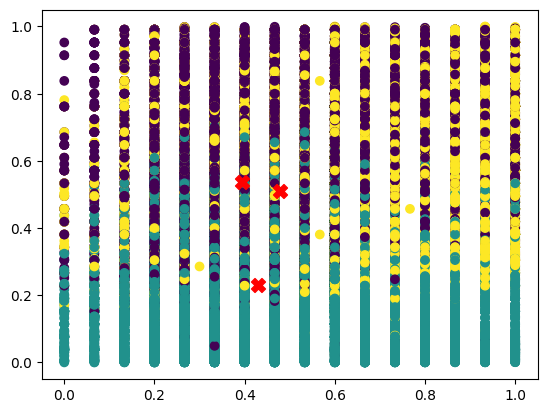

In [414]:
def viz_clusters(kmeans):
    plt.scatter(clusters['years_of_experience'], clusters['ctc'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)

viz_clusters(kmeans)

No clarity in visualization using scatter plot

##Using polar plot for better visialization

In [430]:
# Using polar plot for better visialization:
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
polar

,label,variable,value
0,0,company_hash,0.393457
1,1,company_hash,0.429823
2,2,company_hash,0.478295
3,0,ctc,0.537845
4,1,ctc,0.229339
5,2,ctc,0.510696
6,0,job_position,0.229044
7,1,job_position,0.253654
8,2,job_position,0.245712
9,0,years_of_experience,0.481254


In [431]:
import plotly.express as px

fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=700,width=800)
fig.show()

##Feature definitions:
* Designation: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of Experience
* Class: Salary an employee is getting wrt the salary in the same Company & Job_Position
* Tier: Salary an employee is getting wrt the salary in the same Company descent

#Super clarity in visualizing the clusters using polar line plots:

#Observations and Recommendations:
* We have three clusters mainly (label - 0, 1, 2)
* job_position , years of experience, company_hash for all the people in the three cluster is nearly same. So we can compare the other features keeping this useful info in mind.
* The students whose salaries are already high (Label 0), and who comes from a descent job role in a descent company, having slightly more amount experience, hardly care about designation , class or tier as they all are best of all !!
  * (Recomm.) Scaler should completely ignore these students for advertising/marketing their product as they don't need to upskill as they already are super skilled.
  * (Recomm.) Instead, Scaler team should identify and talk to these folks if they are interested in teaching/mentoring. This way, Scaler would be having best of the best instructors/mentors in the business.
* The students who have median salary (not too high, not too low) (Label 1), and who comes from a descent job role in a descent company, having descent amount experience, requires little upscalling.
  * (Recomm.) Scaler should advertise these set of students with some advanced courses so that they can compete with top tier students.
* The students who have least salary (Label 2), and who comes from a descent job role in a descent company, having descent amount experience, requires lots of upscalling. As these students belongs to designation - 3, class- 3, tier- 3
  * (Recomm.) These are the target audience. Scaler team should heavily focus on advertising / marketing all their tech products/ couses, free master clases, to these set of learners

Elbow method

In [415]:
data_new = data.copy()
data_new

,company_hash,ctc,job_position,years_of_experience,classes,designation,tier
0,45,1100000,361,6.0,1,2,1
1,1435,449999,226,4.0,3,3,3
2,0,2000000,102,7.0,1,1,1
66,904,700000,102,5.0,3,3,3
67,1471,1400000,226,5.0,1,2,1
...,...,...,...,...,...,...,...
15034049,855,2250000,0,11.0,1,1,1
15034131,2075,220000,0,14.0,3,2,3
15034132,618,500000,0,5.0,3,3,3
15034133,2102,700000,0,1.0,3,2,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

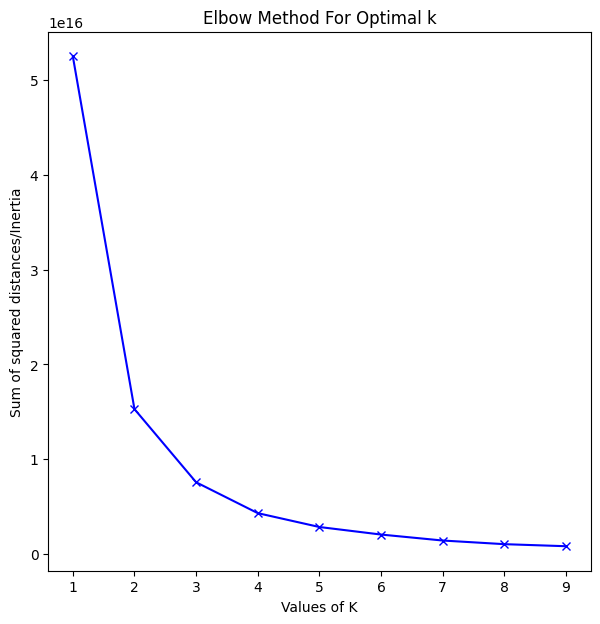

In [416]:
plt.figure(figsize = (7,7))
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_new)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

From above plot, it's clear that we require 3 clusters and our earlier assumption is correct.

In [417]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_new)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.23561270e+03 5.04777019e+05 1.94292942e+02 5.49216642e+00
  2.45951364e+00 2.31887924e+00 2.55894463e+00]
 [1.22223452e+03 1.20861335e+06 1.64440108e+02 6.72251613e+00
  1.67707527e+00 1.79124731e+00 1.60619355e+00]
 [1.16018300e+03 2.05352128e+06 1.49806298e+02 7.51264966e+00
  1.20382975e+00 1.46662293e+00 1.07487289e+00]]
(3, 7)


In [418]:
data_new['k-m label']=kmeans.fit_predict(data_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Hierarchical clustering

In [419]:
data_frac=data_new.sample(frac=0.0025)
#the most we could do without crashing

In [420]:
data_frac

,company_hash,ctc,job_position,years_of_experience,classes,designation,tier,k-m label
1857783,2106,740000,149,6.0,1,1,1,0
12108731,973,420000,0,6.0,3,3,3,0
14558084,2647,1600000,0,6.0,1,1,1,2
4802251,2197,600000,156,5.0,3,1,1,0
8874309,1674,2300000,102,4.0,1,1,1,1
...,...,...,...,...,...,...,...,...
2729602,0,270000,102,3.0,3,3,3,0
1444359,2197,700000,0,4.0,1,1,1,0
14793647,1263,1710000,173,4.0,1,1,1,1
999774,2064,1200000,0,1.0,1,2,1,2


In [421]:
data_frac.drop('k-m label', axis = 1, inplace = True)

In [422]:
import sys
sys.setrecursionlimit(100000)

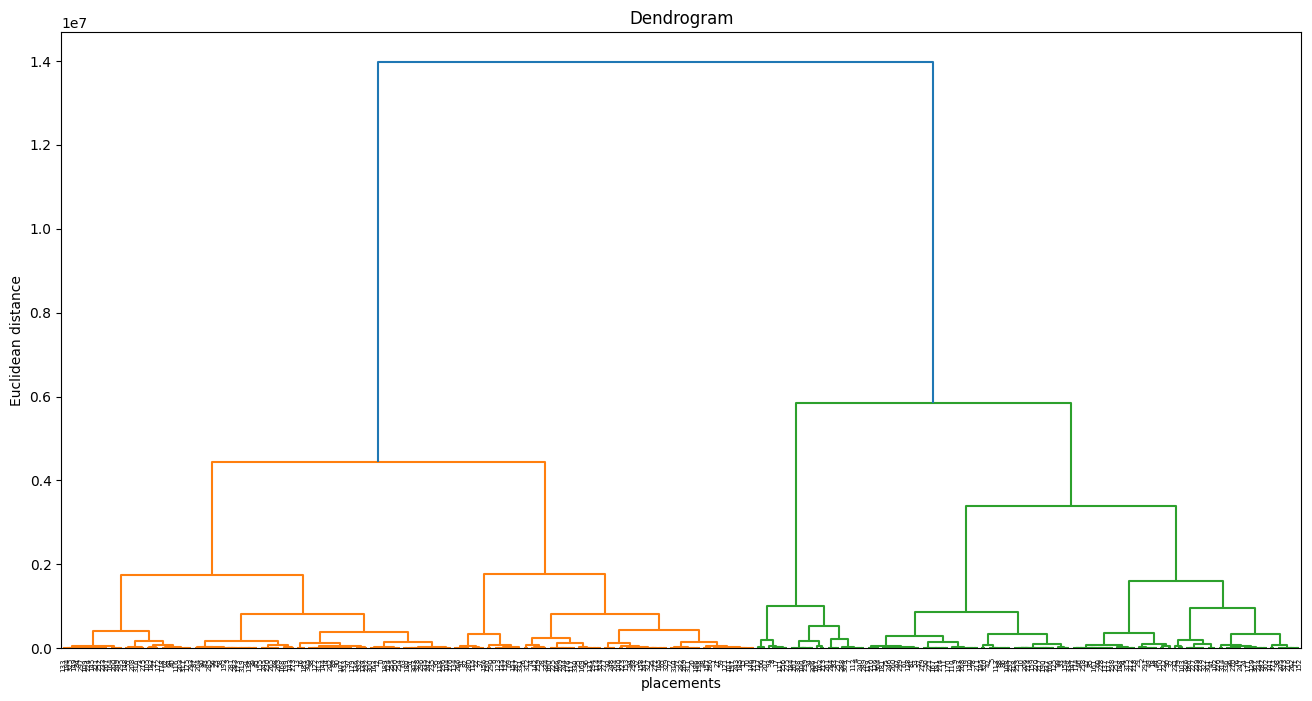

In [423]:
# Visual representation of clusters using dendrogram

plt.figure(figsize = (16,8))
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(data_frac, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('placements')
plt.ylabel('Euclidean distance')
plt.show()

In [424]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(data_frac)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [425]:
data_frac['Aglo-label'] = model.fit_predict(data_frac)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [426]:
data_frac

,company_hash,ctc,job_position,years_of_experience,classes,designation,tier,Aglo-label
1857783,2106,740000,149,6.0,1,1,1,0
12108731,973,420000,0,6.0,3,3,3,0
14558084,2647,1600000,0,6.0,1,1,1,1
4802251,2197,600000,156,5.0,3,1,1,0
8874309,1674,2300000,102,4.0,1,1,1,2
...,...,...,...,...,...,...,...,...
2729602,0,270000,102,3.0,3,3,3,0
1444359,2197,700000,0,4.0,1,1,1,0
14793647,1263,1710000,173,4.0,1,1,1,1
999774,2064,1200000,0,1.0,1,2,1,1


In [441]:
df_cjy_cj_c

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,1
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1
66,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3
67,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1
...,...,...,...,...,...,...,...,...,...
15034049,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,1
15034131,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,3
15034132,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,3
15034133,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,3


In [442]:
data_org = df_cjy_cj_c.copy()
final_data = pd.concat([data_org,data_new['k-m label']], axis=1)
final_data

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,classes,designation,tier,k-m label
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,6.0,1,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,4.0,3,3,3,0
2,Others,2015.0,2000000,backend engineer,2020.0,7.0,1,1,1,1
66,ngpgutaxv,2017.0,700000,backend engineer,2019.0,5.0,3,3,3,0
67,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,5.0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
15034049,mvqwrvjo,2011.0,2250000,Others,2019.0,11.0,1,1,1,1
15034131,vuurt xzw,2008.0,220000,Others,2019.0,14.0,3,2,3,0
15034132,husqvawgb,2017.0,500000,Others,2020.0,5.0,3,3,3,0
15034133,vwwgrxnt,2021.0,700000,Others,2021.0,1.0,3,2,3,0


Final_data is the dataset with label that used by marketing team to focus on marketing strategies